模型训练解决的问题是：超参数固定时，模型参数的训练方法，针对超参数的选择时下一节“模型验证”中的问题。

本小节接着上小节特征工程后的数据结果进行分析，上节结果已经存储为new_test_pca_16.csv、new_train_pca_16.csv，用这两个数据介绍常用算法的sklearn接口。

# 数据准备

导入相关库

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

读取数据

In [ ]:
train_data_file = "./steam_data/new_train_pca_16.csv"
test_data_file =  "./steam_data/new_test_pca_16.csv"

new_train_pca_16 = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
new_test_pca_16 = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

display(new_train_pca_16)

# 模型学习曲线函数

In [176]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 20)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    print(train_scores_mean)
    print(test_scores_mean)
    
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

# 线性回归

总体表现

In [175]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=None, shuffle=True)


clf = LinearRegression()
clf.fit(train_data, train_target)
train_score = mean_squared_error(train_target, clf.predict(train_data))
test_score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:   ", train_score, test_score)

LinearRegression:    0.30315923356898994 0.37560535148410845


学习曲线

[0.68305281 0.67236428 0.67115428 0.67168417 0.67457473 0.67782972
 0.67407025 0.67181711 0.67205424 0.67561121 0.6737649  0.67018081
 0.67166505 0.67259892 0.67361296 0.67317961 0.6727847  0.67102359
 0.67084777 0.67026007]
[0.62714192 0.65077282 0.66000591 0.66527386 0.66983502 0.67246146
 0.67175483 0.67287184 0.67340416 0.67374023 0.67448012 0.6762262
 0.67702576 0.67675905 0.67690356 0.67718343 0.67692734 0.67702113
 0.67688846 0.67665818]


<module 'matplotlib.pyplot' from '/home/sike/anaconda3/envs/mxnet_true/lib/python3.6/site-packages/matplotlib/pyplot.py'>

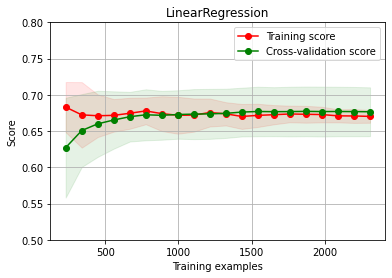

In [177]:
# 切分训练数据和线下验证数据
X = train.values
y = target.values
 
# 图一
title = r"LinearRegression"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=None)
estimator = LinearRegression()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 0.8), cv=cv, n_jobs=-1)

# K近邻回归

总体表现

In [218]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=None, shuffle=True)


clf = KNeighborsRegressor(n_neighbors=8) # 最近三个
clf.fit(train_data, train_target)
train_score = mean_squared_error(train_target, clf.predict(train_data))
test_score = mean_squared_error(test_target, clf.predict(test_data))
print("KNeighborsRegressor:   ", train_score, score)

KNeighborsRegressor:    0.2393966373618934 0.3156493398302335


学习曲线

[0.65817557 0.68152747 0.694179   0.70403892 0.70850225 0.71413134
 0.7196759  0.72497523 0.72809137 0.731753   0.73503017 0.73783063
 0.74025915 0.74274574 0.74513982 0.74728257 0.7488858  0.75001741
 0.75213852 0.75336027]
[0.56244629 0.58308181 0.59893259 0.61107414 0.61877702 0.62587136
 0.63293411 0.63833175 0.64425049 0.64954041 0.65277765 0.65626508
 0.658856   0.66253751 0.66478155 0.66661591 0.66826964 0.67098758
 0.67323629 0.67488394]


<module 'matplotlib.pyplot' from '/home/sike/anaconda3/envs/mxnet_true/lib/python3.6/site-packages/matplotlib/pyplot.py'>

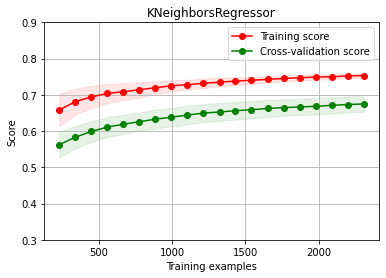

In [221]:
X = train.values
y = target.values
 
# K近邻回归
title = r"KNeighborsRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsRegressor(n_neighbors=8)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.3, 0.9), cv=cv, n_jobs=-1)

# 决策树回归

总体表现

In [273]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=None, shuffle=True)


clf = DecisionTreeRegressor() 
clf.fit(train_data, train_target)
train_score = mean_squared_error(train_target, clf.predict(train_data))
test_score = mean_squared_error(test_target, clf.predict(test_data))
print("KNeighborsRegressor:   ", train_score, score)

KNeighborsRegressor:    0.0 0.3156493398302335


学习曲线

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.23091734 0.27459386 0.29077793 0.30622906 0.30246904 0.31485809
 0.31903095 0.31063073 0.32729036 0.33301075 0.34002725 0.33837398
 0.35809144 0.35896566 0.35419979 0.35971905 0.35426368 0.36223045
 0.35123948 0.35699224]


<module 'matplotlib.pyplot' from '/home/sike/anaconda3/envs/mxnet_true/lib/python3.6/site-packages/matplotlib/pyplot.py'>

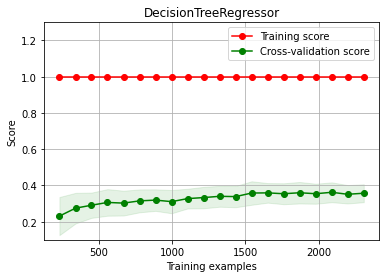

In [274]:
X = train.values
y = target.values
 
# K近邻回归
title = r"DecisionTreeRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeRegressor()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.3), cv=cv, n_jobs=-1)

# 随机森林回归

总体表现

In [286]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=None, shuffle=True)


clf = RandomForestRegressor(n_estimators=200, n_jobs=-1) # 200棵树模型
clf.fit(train_data, train_target)
train_score = mean_squared_error(train_target, clf.predict(train_data))
test_score = mean_squared_error(test_target, clf.predict(test_data))
print("KNeighborsRegressor:   ", train_score, score)

KNeighborsRegressor:    0.04073147783064338 0.3156493398302335


学习曲线

[0.94370018 0.94769907 0.94943264 0.95096913 0.95183423 0.95263147
 0.95328231 0.9540855  0.95452554 0.95504677 0.95542633 0.95583356
 0.95618288 0.95634077 0.95654962 0.95693003 0.95719364 0.9572942
 0.95745547 0.95760855]
[0.59983636 0.62099042 0.63490053 0.64422109 0.65125589 0.65659418
 0.66132025 0.66481209 0.66823193 0.6713064  0.67397511 0.67640729
 0.67888014 0.68148471 0.68346729 0.68549612 0.68682454 0.68822767
 0.68912421 0.69089154]


<module 'matplotlib.pyplot' from '/home/sike/anaconda3/envs/mxnet_true/lib/python3.6/site-packages/matplotlib/pyplot.py'>

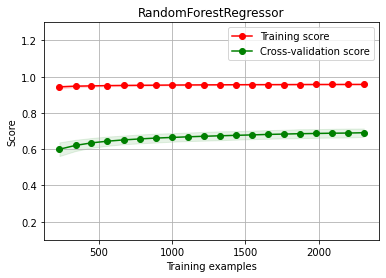

In [287]:
X = train.values
y = target.values
 
# K近邻回归
title = r"RandomForestRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_estimators=200)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.3), cv=cv, n_jobs=-1)

# lgb模型回归

总体表现

In [288]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=None, shuffle=True)


# lgb回归模型
clf = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression',
    )

# 训练模型
clf.fit(
        X=train_data, y=train_target,
        eval_metric='MSE',
        verbose=50
    )
train_score = mean_squared_error(train_target, clf.predict(train_data))
test_score = mean_squared_error(test_target, clf.predict(test_data))
print("KNeighborsRegressor:   ", train_score, score)

KNeighborsRegressor:    0.0005021410643809555 0.3156493398302335


学习曲线

[0.59885541 0.62810913 0.64198231 0.65197041 0.65847237 0.66339557
 0.66542187 0.66543207 0.66420344 0.66308203 0.66178197 0.65965424
 0.65754479 0.65534044 0.65350218 0.65168757 0.64982832 0.64767091
 0.64590572 0.64398853]
[0.48493272 0.50728965 0.52089215 0.53059591 0.53628432 0.54200189
 0.54678551 0.54978335 0.55241354 0.5529982  0.55564123 0.55720183
 0.55822773 0.55936593 0.56046035 0.55932759 0.56174331 0.56153489
 0.56241155 0.56268848]


<module 'matplotlib.pyplot' from '/home/sike/anaconda3/envs/mxnet_true/lib/python3.6/site-packages/matplotlib/pyplot.py'>

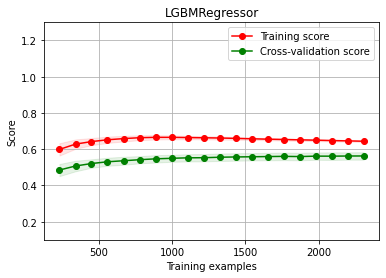

In [289]:
X = train.values
y = target.values
 
title = r"LGBMRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = lgb.LGBMRegressor(
    learning_rate=0.01,
    max_depth=-1,
    n_estimators=100,
    boosting_type='gbdt',
    random_state=2019,
    objective='regression'
    ) 

plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.3), cv=cv, n_jobs=-1)